# Pymaceuticals Inc.
---

## Analysis
* This is a great spot to put your final analysis

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on=('Mouse ID'))
# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
# Checking the number of mice.
mouse_count = len(combined_data['Mouse ID'].unique())
print(f"There are {mouse_count} mice in this study.")


There are 249 mice in this study.


In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()




In [21]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = combined_data[combined_data["Mouse ID"].isin(duplicate_mice) == False]
cleaned_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_mice['Mouse ID'].unique())
print(f"There are {cleaned_mouse_count} mice in this study.")


There are 248 mice in this study.


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tum_vol_stats = cleaned_mice.loc[:, ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

mean = tum_vol_stats.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = tum_vol_stats.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = tum_vol_stats.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev = tum_vol_stats.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = tum_vol_stats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std Dev": stddev, "Tumor Volume Std Er": sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Er
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
groupby_stats = cleaned_mice.groupby('Drug Regimen')

summary_stats_2 = groupby_stats.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_stats_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

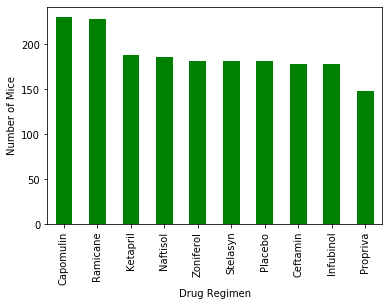

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_treatment = cleaned_mice["Drug Regimen"].value_counts()
y_axis = mouse_per_treatment.values
x_axis= mouse_per_treatment.index

mouse_per_treatment.plot(kind="bar", color='green')

plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()




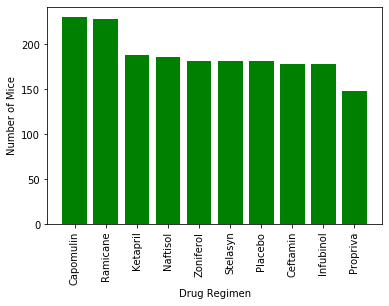

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_per_treatment = cleaned_mice["Drug Regimen"].value_counts()

y_axis = mouse_per_treatment.values
x_treatment= mouse_per_treatment.index

plt.bar(x_treatment, y_axis, color='g')

plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

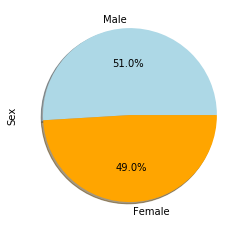

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_dis = cleaned_mice["Sex"].value_counts()
labels = male_female_dis.index
size = male_female_dis.values
colors = ["lightblue", "orange"]
explode=[0,0]
male_female_dis.plot(kind="pie", explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)


([<matplotlib.patches.Wedge at 0x7fcc82feac90>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

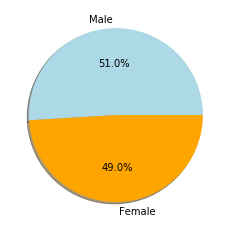

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female_dis = cleaned_mice["Sex"].value_counts()
labels = male_female_dis.index
size = male_female_dis.values
colors = ["lightblue", "orange"]
explode=[0,0]

plt.pie(size, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [1]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


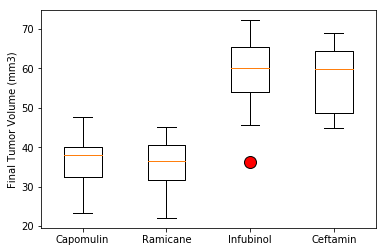

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

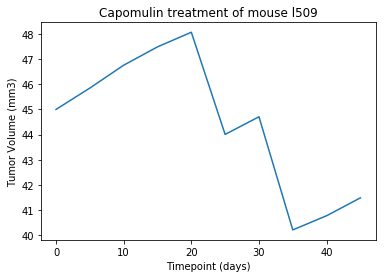

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


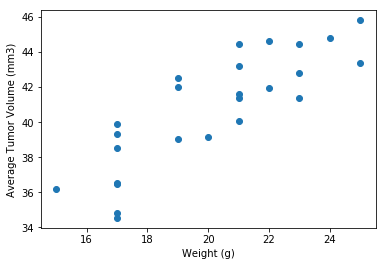

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


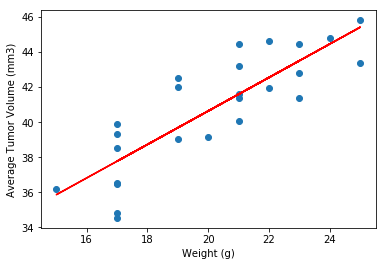

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
